<a href="https://colab.research.google.com/github/ashutosh-sharma-xi/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

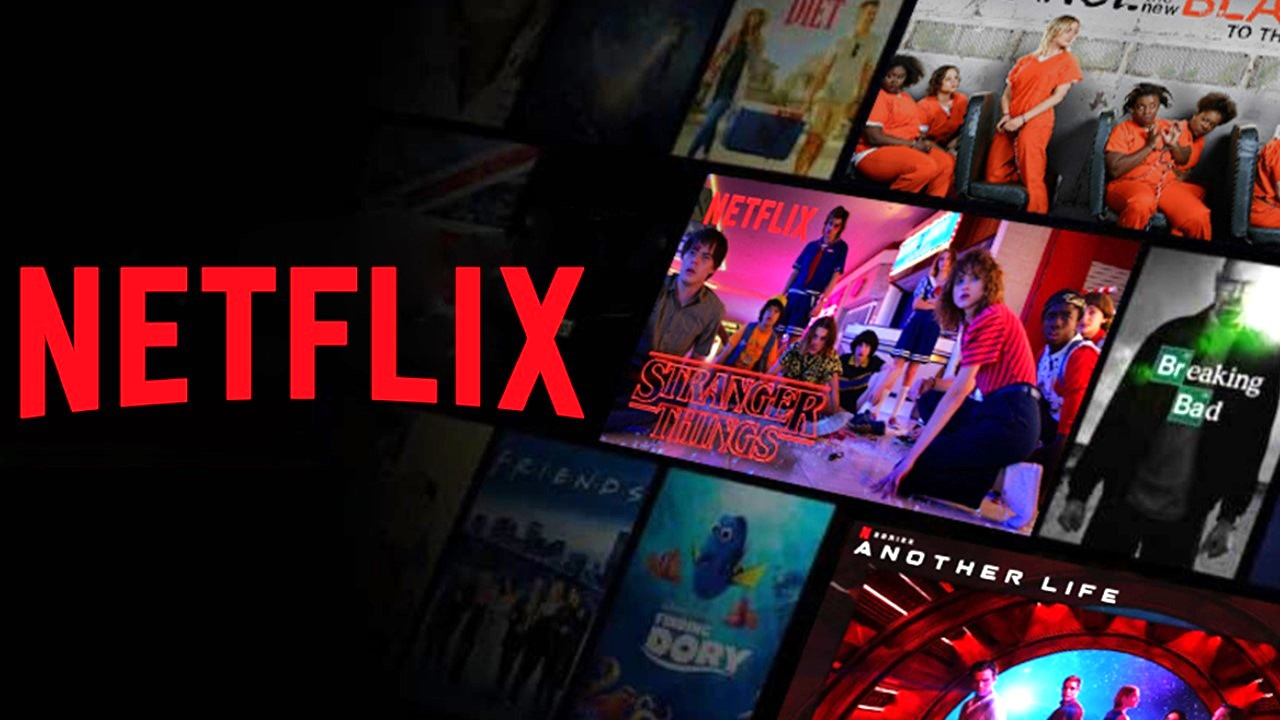

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#**Importing Basic Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import plotly.express as px

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

**bold text**#**Importing dataset**

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#from jyotsana drive
# netflix_df = pd.read_csv('/content/drive/MyDrive/Fourth Capstone Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

#from ashutosh_drive
netflix_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter /Capstone Project/Clustering/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

#**Basic Data Exploration and Data Cleaning**


In [4]:
#Top five row of data
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
#Bottom five rows of data
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
#look at the shape of the data
netflix_df.shape

(7787, 12)

we have **7787 rows** and **12 columns** in our data set.

In [7]:
#columns name
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
#Information about the data
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
#Checking for duplicate values
netflix_df.duplicated().sum()

0

In [10]:
#Discription of data
netflix_df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [11]:
#Checking the null value count for each column
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
#Checking Percentage wise missing values.
def missing_values_per_check(df):
    percent_missing = netflix_df.isnull().sum() * 100 / len(netflix_df)
    missing_values_df = pd.DataFrame({'column_name': netflix_df.columns,
                                     'percent_missing': percent_missing})
    return missing_values_df.sort_values('percent_missing',ascending=False)

In [13]:
#Checking Percentage wise missing values.
missing_values_per_check(netflix_df)

,column_name,percent_missing
director,director,30.679337
cast,cast,9.220496
country,country,6.510851
date_added,date_added,0.128419
rating,rating,0.089893
show_id,show_id,0.000000
type,type,0.000000
title,title,0.000000
release_year,release_year,0.000000
duration,duration,0.000000


**Using barplot to check the no of NaN values present in this dataset**

<BarContainer object of 12 artists>

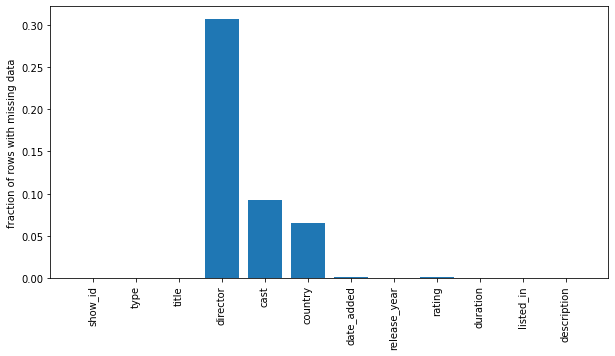

In [14]:
# null value distribution
null_counts = netflix_df.isnull().sum()/len(netflix_df)
plt.figure(figsize=(10,5))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)


* **Director** column column has highest NaN values 30.7% data is missing.
* **Cast** column has 9% NaN values.
* **country , date_added , rating** this columns also containing missing values.

In [15]:
#Handling null values
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna('Unknown')

Filling the null values of column **Director,Cast and Country** with **Unknown**.

In [16]:
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])

Filling the null values of column **Rating** with **Mode of ratings** as it is a numerical column.

Now we only left with 10 missing values in **date_added**,which we can drop.

In [17]:
netflix_df.dropna(axis=0, inplace = True)

Again checking null values in data

In [18]:
#Checking the null value count for each column
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We have successfully handled all the missing values in the dataset.

### **Checking For Outliers on date added feature**




In [19]:
#Shape of the data
netflix_df.shape

(7777, 12)

In [20]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [21]:
'''lets remove the outliers of dependent feature 'release_year' and 'date_added  we can
scale the independent features to reduce influence of outliers ''' 

netflix_df.date_added = pd.to_datetime(netflix_df.date_added)
# Outlier Detection 
# IQR 
def IQR_Outlier_remover(column, column_name):
    Q1 = np.percentile(column, 25,
                      interpolation = 'midpoint')

    Q3 = np.percentile(column, 75,
                      interpolation = 'midpoint')
    IQR = Q3 - Q1

    print(f"before outlier removal of {column_name} Old Shape: ", netflix_df.shape)

    # Upper bound
    upper = np.where(column >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(column <= (Q1-1.5*IQR))

    # Removing the Outliers 
    netflix_df.drop(upper[0], inplace = True)
    netflix_df.drop(lower[0], inplace = True)

    print(f"after outlier removal of {column_name} New Shape: ", netflix_df.shape)

# remove outliers of  release_year
# IQR_Outlier_remover(netflix_df.release_year, 'release_year')

# remove outliers of  date_added
IQR_Outlier_remover(netflix_df.date_added, 'date_added')

before outlier removal of date_added Old Shape:  (7777, 12)
after outlier removal of date_added New Shape:  (7716, 12)


### With the help of Outlier removal technique based on IQR we were able to successfully remove 61 rows based on date_added outliers

#**Exploratory Data Analysis**

**1.Type of content available on Netflix**

In [22]:
#Checking numbre of tv-shows and movies available
netflix_df['type'].value_counts()

Movie      5330
TV Show    2386
Name: type, dtype: int64

([<matplotlib.patches.Wedge at 0x7f0563727bd0>,
 [Text(-1.0022349788072438, -0.4533487038199664, 'Movie'),
  Text(1.047791114207573, 0.4739554630845106, 'TV Show')],
 [Text(-0.5466736248039511, -0.24728111117452709, '69.1%'),
  Text(0.5922297602042803, 0.2678878704390712, '30.9%')])

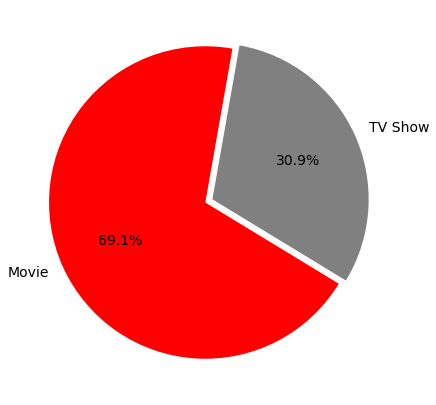

In [23]:
plt.rcParams['figure.figsize'] = 7,8
labels = netflix_df['type'].value_counts().index.tolist()
size = netflix_df['type'].value_counts().tolist()
explode = (0, 0.05)
colors = ['red','grey']
plt.pie(size, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=80, textprops={'fontsize': 14})

**Observation**

  * In our dataset we have around 69% content as movies 
  
  * Remaining 31% as TV shows.

Here we have more numberes of Movies than TV shows.

**2.Ratings of movies and tv-shows on Netflix.**

In [24]:
netflix_df['rating'].value_counts()

TV-MA       2849
TV-14       1907
TV-PG        800
R            660
PG-13        382
TV-Y         279
TV-Y7        268
PG           246
TV-G         192
NR            81
G             38
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

Highest number of shows on Netflix are rated by **TV-MA**, followed by **TV-14 and TV-PG**.

For making our analysis more effective we are changing the values in **rating column.**

In [25]:
#Changing the values
new_rating = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

In [26]:
#Coverting them
netflix_df['rating'].replace(new_rating, inplace = True)

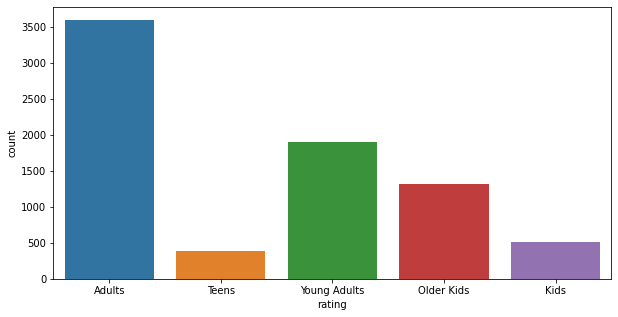

In [27]:
#Plotting the graph according to new rating 
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data = netflix_df)

**Observations**
  * Most content on Netflix is rated for Mature Audiences and over 14 years old.

  *  Followed by young adults, older kids and kids.

  * Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

**3.Top 10 genres on Netflix**

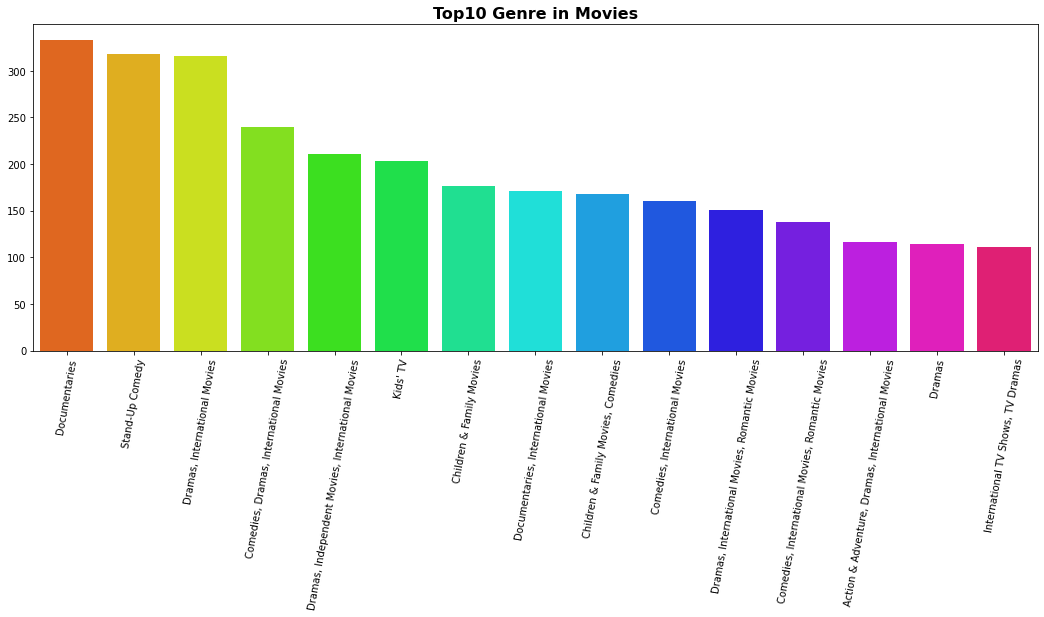

In [28]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x =netflix_df["listed_in"].value_counts().head(15).index,
            y = netflix_df["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

**Documentaries** is the topmost genre available on Netflix.On second position we have **Stand-up comedy** and **Dramas**.



In [29]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,Adults,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,Adults,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,Adults,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,Teens,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...


**4.Number of shows added over the years**

In [30]:
#fetch date from date_added column for eda
date_added = pd.to_datetime(netflix_df.date_added)

Text(0.5, 0, '')

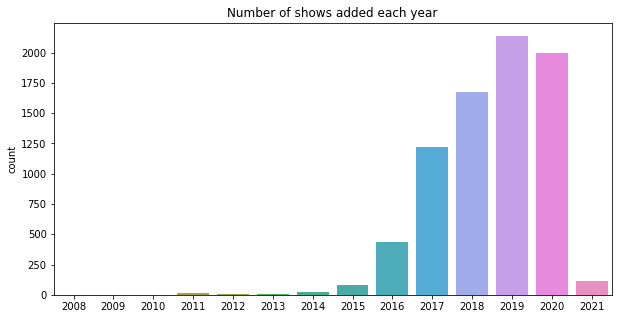

In [31]:
# Number of shows added over the years
plt.figure(figsize = (10,5)) 

#plot graph
sns.countplot(date_added.dt.year)
plt.title('Number of shows added each year')
plt.xlabel('')

* The number of release have significantly increased after **2015**.

* We have highest number of release in the year **2019**.

* Release have dropped in **2021** becase of Covid 19.

**5.Release_month of different content on Netflix**

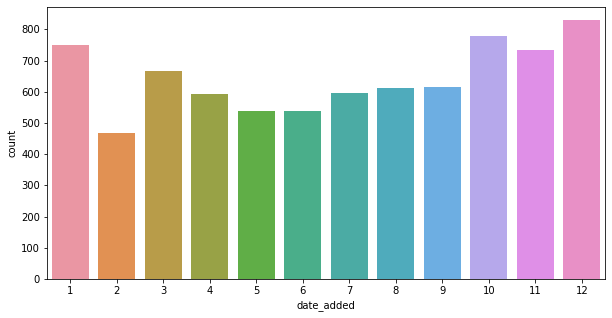

In [32]:
# Plotting the Countplot 
plt.figure(figsize=(10,5))
ax=sns.countplot(date_added.dt.month)

Maximum number of movies and tv-shows were added from **October to January**.

**6.Most used word in title of content on Netflix**

we will plot a wordcloud to see the major words in title column

In [33]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 143779 words in the combination of all titles.


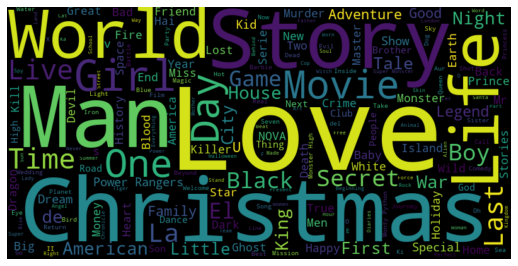

In [34]:
#chcking word cloud from title column
text = " ".join(topic for topic in netflix_df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (14,6)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**'Love', 'Christmas', 'World', 'Story', 'Man', 'Live', 'Girl', 'Life'** these are the most appeared words in titles of Movies and TV shows.

**7.Frequent Cast on Netflix**

In [35]:
# Create a list of all the actors in the data.
def data2list(data):
  actor_list = {}  
  temp_list = []   
  cast_list = list(data['cast'])  
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [36]:
# Create dataframe for list of actors.
actor_list = pd.DataFrame([data2list(netflix_df)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False).drop(106) 

In [37]:
actor_list.head(5)

,index,0
1296,Anupam Kher,37
194,Takahiro Sakurai,28
2187,Om Puri,27
4024,Shah Rukh Khan,26
742,Boman Irani,25


In [38]:
# Plot it.
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#564d4d', '#db0000'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show()

Top actors on Netflix are-

* Anupam Kher
* Takahiro Sakurai
* Shah Rukh Khan
* Om Puri

**8.Number of seasons of tv shows**

Text(0.5, 1.0, 'Number of seasons per TV show distribution')

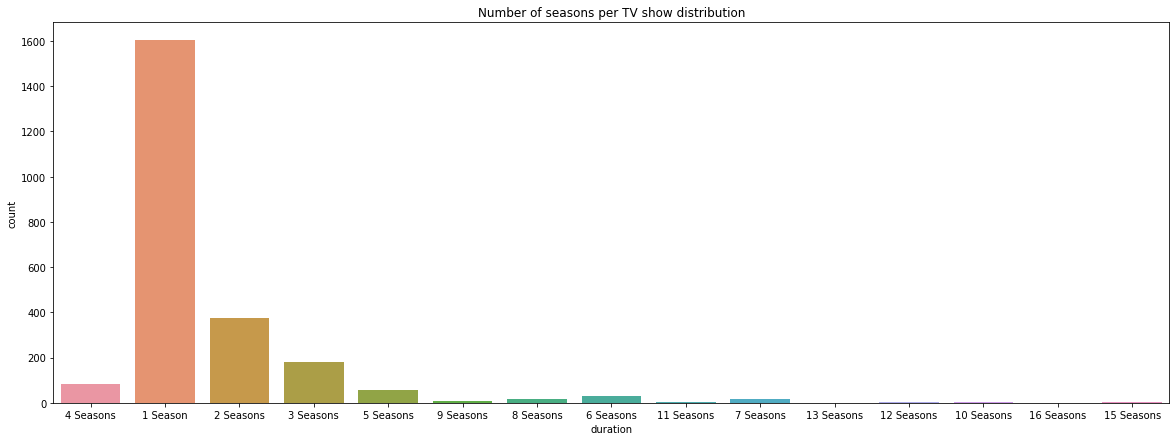

In [39]:
# Seasons in each TV show
plt.figure(figsize=(20,7))
p = sns.countplot(x='duration',data = netflix_df[netflix_df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')


Most of the tv-shows have only **1 Season**.

The TV series in the dataset have up to **16 seasons**.

There are very few TV shows that have more than **8 seasons**.

**9.Top 10 countries with the highest number movies / TV shows on Netflix**



Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

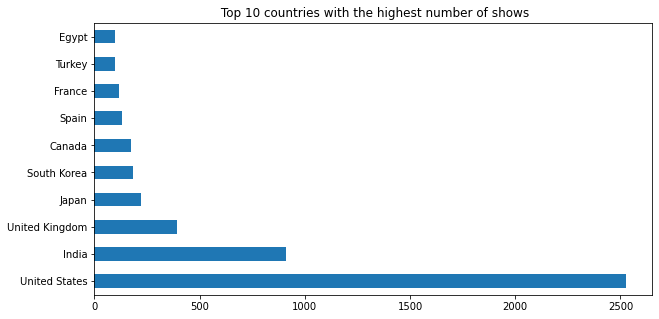

In [40]:
#Plooting graph
plt.figure(figsize=(10,5))
netflix_df[~(netflix_df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

The highest number of movies / TV shows were based out of the **United States**, followed by **India and United Kingdom**.

#**Feature Engineering**

1 .Breaking **Date_added** column--

In [41]:
netflix_df['date_added'][1]

Timestamp('2016-12-23 00:00:00')

In [42]:
#Converting date_added column to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

Our **date_added** column successfully converted into **datetime** type.

Now we will extract **Year, month and date** from date_added column and create seperate columns for each for ease of operations.

In [43]:
#Creating 'year' column
# netflix_df['year'] = netflix_df['date_added'].dt.year

In [44]:
#creating 'month' column
# netflix_df['month'] = netflix_df['date_added'].dt.month

In [45]:
#Creating 'day' column
# netflix_df['day'] = netflix_df['date_added'].dt.day

In [46]:
netflix_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,Adults,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


We will drop column **date_added**  and **release year** as we create seperate columns for it according to **year and month**

In [47]:
# Dropping 'date_added' as we create seperate columns
# netflix_df.drop(columns="date_added",axis=1,inplace=True)

In [48]:
# Dropping 'release_year' as we create seperate columns
# netflix_df.drop(columns="release_year",axis=1,inplace=True)

2. Renaming **listed_in** column to **genres**

In [49]:
#Renaming the column
netflix_df.rename(columns = {'listed_in' : 'genres'},inplace = True)

In [50]:
#columns of data
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

#**Data Pre-Processing**

Bag of words is a **Natural Language Processing** technique of text modelling.A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. 

In [51]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.translate.nist_score import ngrams
from gensim.models import word2vec, FastText
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.decomposition import PCA
import re
from textblob import Word

# download nltk stopwords which does not come by default in nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [52]:
netflix_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,Adults,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,Adults,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,Adults,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [53]:
# casting type feature from categorical to numeric
netflix_df['type'] = np.where(netflix_df['type'] == 'TV Show' ,1,0)

In [54]:
# convert ratings to numeric

# function to return numeric value of any specific rating user kind
def rating_rep(wor):
  new_ratings = {'Adults':0, 'Teens':1, 'Young Adults':2, 'Older Kids':3, 'Kids':4} 
  return new_ratings[wor]

# convert
netflix_df['rating'] = netflix_df.rating.apply(lambda x: rating_rep(x))


In [55]:
# define a function to split sentence into words
def split_word(par):
  return par.split(',')

# function to convert word to lower case
def word_lower(wor):
  return wor.lower()

# function to strip word's spaces
def word_strip(wor):
  return wor.strip()

In [56]:
# convert all text features to lower case
netflix_df['cast'] = netflix_df['cast'].apply(lambda word: word_lower(word))
netflix_df['director'] = netflix_df['director'].apply(lambda word: word_lower(word))
netflix_df['country'] = netflix_df['country'].apply(lambda word: word_lower(word))
# netflix_df['rating'] = netflix_df['rating'].apply(lambda word: word_lower(word))
netflix_df['genres'] = netflix_df['genres'].apply(lambda word: word_lower(word))
netflix_df['description'] = netflix_df['description'].apply(lambda word: word_lower(word))

In [57]:
# applying count vectorizer to cast
import re
re_exp = r"\,"
count_vec = CountVectorizer(tokenizer=lambda text: re.split(re_exp,text), min_df= 2)

cast_vec = count_vec.fit_transform(netflix_df['cast'])
cast_feature_names = count_vec.get_feature_names()
dense_cast = cast_vec .todense()
# denselist = dense.tolist()
cast_vector = pd.DataFrame(dense_cast, columns=cast_feature_names)

In [58]:
# applying count vectorizer to genres 

genre_vec = count_vec.fit_transform(netflix_df['genres'])
gen_feature_names = count_vec.get_feature_names()
dense_gen = genre_vec.todense()
# denselist = dense.tolist()
gen_vector = pd.DataFrame(dense_gen, columns=gen_feature_names)


In [59]:

# country_vector = netflix_df['country'].str.split(pat = ",", expand=True).apply(lambda x : x.value_counts(), axis = 1).fillna(0).astype(int)

# applying count vectorizer to country 

country_vec = count_vec.fit_transform(netflix_df['country'])
coun_feature_names = count_vec.get_feature_names()
dense_coun = country_vec .todense()
# denselist = dense.tolist()
coun_vector = pd.DataFrame(dense_coun, columns=coun_feature_names)

 **Lets work with Description feature now**




In [60]:

## remove tabulation and punctuation
netflix_df['new_description'] = netflix_df['description'].str.replace('[^\w\s]',' ')

## digits
netflix_df['new_description'] = netflix_df['description'].str.replace('\d+', '')

#remove stop words
stop = stopwords.words('english')
netflix_df['new_description'] =netflix_df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatization
netflix_df['new_description'] = netflix_df['new_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# print("Preprocessed data: \n")
print(netflix_df.head(1))


  show_id  type title director  \
0      s1     1    3%  unknown   

                                                cast country date_added  \
0  joão miguel, bianca comparato, michel gomes, r...  brazil 2020-08-14   

   release_year  rating   duration  \
0          2020       0  4 Seasons   

                                              genres  \
0  international tv shows, tv dramas, tv sci-fi &...   

                                         description  \
0  in a future where the elite inhabit an island ...   

                                     new_description  
0  future elite inhabit island paradise far crowd...  


In [61]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,new_description
0,s1,1,3%,unknown,"joão miguel, bianca comparato, michel gomes, r...",brazil,2020-08-14,2020,0,4 Seasons,"international tv shows, tv dramas, tv sci-fi &...",in a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...
1,s2,0,7:19,jorge michel grau,"demián bichir, héctor bonilla, oscar serrano, ...",mexico,2016-12-23,2016,0,93 min,"dramas, international movies",after a devastating earthquake hits mexico cit...,"devastating earthquake hit mexico city, trappe..."


In [62]:
# lets create a tfidf vector for description
# vectorizer = TfidfVectorizer(ngram_range = (2,2), max_features= 20000, min_df = 2)
vectorizer = TfidfVectorizer( max_features= 20000, min_df = 2)
# vectorizer = CountVectorizer(ngram_range = (3,3))
vectors = vectorizer.fit_transform(netflix_df['new_description'])
feature_names = vectorizer.get_feature_names()
dense_desc = vectors.todense()
# denselist = dense.tolist()
temp_df_desc = pd.DataFrame(dense_desc, columns=feature_names)

### MinMax Scaling on Type and rating as they are the only column with values ranging other than 0-1

In [63]:
# features to include from netflix_df   :   type, rating
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rating_n_type = scaler.fit_transform(netflix_df[['rating','type']])
rating_n_type =  pd.DataFrame(rating_n_type , columns = ['rating','type'])

## create the final dataframe for clustering

In [64]:
# create a new dataframe
new_df = pd.concat([rating_n_type,cast_vector, gen_vector, coun_vector, temp_df_desc], axis = 1)

## Apply PCA on the DataFrame

In [65]:
# import pca and create its object
from sklearn.decomposition import PCA
pca_test = PCA() 
pca_test.fit_transform(new_df)


array([[-8.35034262e-01,  8.35263351e-01,  2.36221079e-01, ...,
         1.40605870e-20,  2.41811549e-20,  1.55894523e-22],
       [ 8.83188674e-01,  2.68272140e-01,  6.78235727e-01, ...,
         1.40605870e-20,  2.41811549e-20,  1.55894523e-22],
       [ 6.18112867e-01,  2.35834717e-01,  3.22254547e-02, ...,
         1.40605870e-20,  2.41811549e-20,  1.55894523e-22],
       ...,
       [ 6.06969871e-01,  2.08494844e-01, -1.64258511e-01, ...,
         1.40605870e-20,  2.41811549e-20,  1.55894523e-22],
       [-7.36455916e-01,  7.15687315e-01, -1.01101563e-01, ...,
         1.40605870e-20,  2.41811549e-20,  1.55894523e-22],
       [ 2.46276738e-02, -7.22004373e-02, -1.37113490e-01, ...,
         1.40605870e-20,  2.41811549e-20,  1.55894523e-22]])

Text(0, 0.5, 'Cumulative Explained Variance')

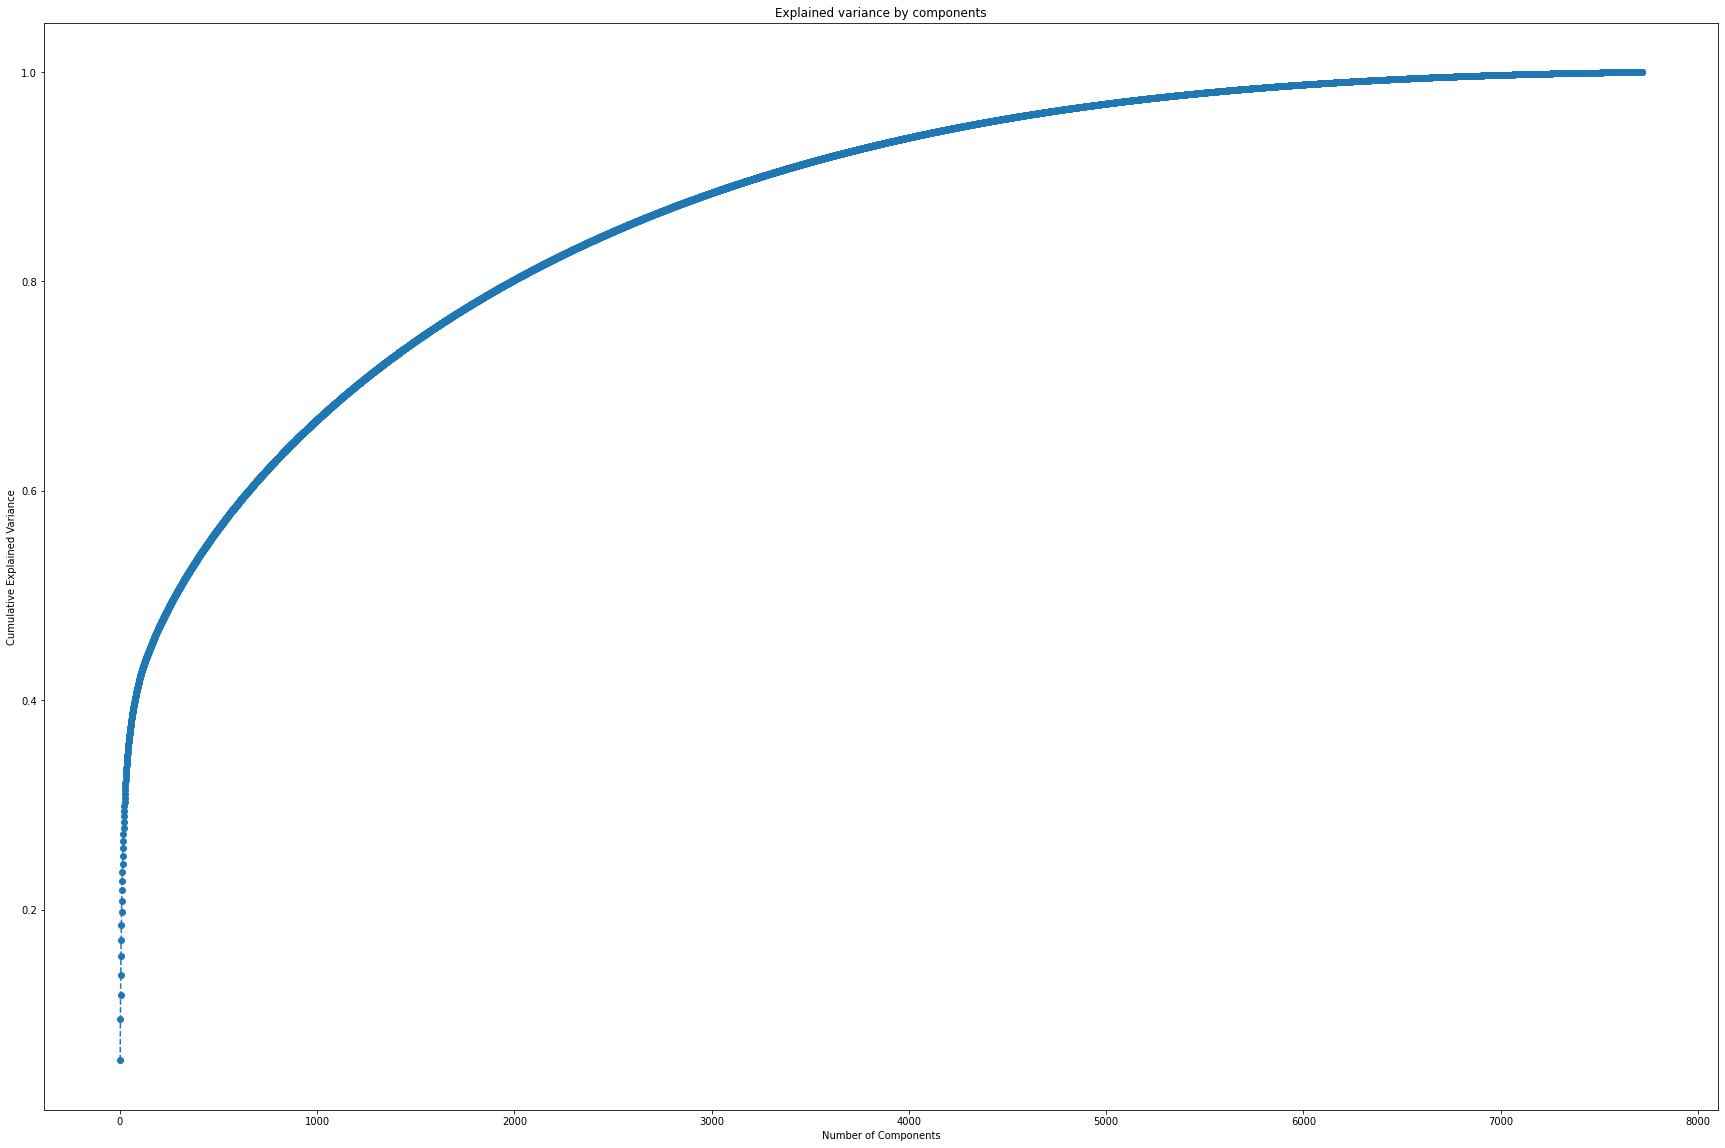

In [66]:
# plot the explained variance by component plot to select the optimum number of n_components 
plt.figure(figsize = (30,20))
plt.plot(range(1,7717),pca_test.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

### The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80-85 % of the variance. So, in this instance, we decide to keep 3000 components.

### **Create a PCA with n_component = 3000**

In [67]:
pca = PCA(n_components = 3000)
pca_score = pca.fit_transform(new_df)

In [68]:
# https://365datascience.com/tutorials/python-tutorials/pca-k-means/

#  **Model Building**
## We will buid 3 Models here

## 1.   KMeans Clustering
## 2.   Agglomerative Clustering
## 3.   DBScan Clustering



---

In [69]:
# convert dataframe to array for clustering
X = pca_score

## **KMeans Clustering**

In [70]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 30.  
for i in range(1, 30):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(pca_score)  
    
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 30), wcss_list)  
plt.title('The Elbow Method Graph to find optimum numbe rof clusters')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('WCSS')  
plt.show()

KeyboardInterrupt: ignored

### now lets check silhouette score

In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters 
sill = [] 
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(pca_score)
    y1 = model.predict(pca_score)
    score = silhouette_score(pca_score,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

In [ ]:
#Plotting Sillhoute's score
plt.figure(figsize=(10,8))
plt.title('silhoutte Score')
plt.plot(sill,'bs--')
plt.xticks(list(range(0,30)),list(range(2,30)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

Using yellowbricks visualize the clusters number visualizer 

In [ ]:
# from yellowbrick.cluster import SilhouetteVisualizer

# fig, ax = plt.subplots(2, 2, figsize=(15,8))
# for i in [2, 3, 4, 5]:
#     '''
#     Create KMeans instance for different number of clusters
#     '''
#     km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
#     q, mod = divmod(i, 2)
#     '''
#     Create SilhouetteVisualizer instance with KMeans instance
#     Fit the visualizer
#     '''
#     visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
#     visualizer.fit(pca_score)

### create a KMeans model

In [ ]:
# create a K-means model
kmeans_model = KMeans(n_clusters = 20, init = 'k-means++', random_state = 51)

In [ ]:
# fit a model 
kmeans_model.fit(pca_score)

In [ ]:
#training the K-means model on a dataset  
y_predict= kmeans_model.predict(pca_score)

In [ ]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(pca_score, y_predict)
print("Silhouette score is {}".format(score))

In [ ]:
#Adding a seperate column for the cluster
netflix_df["cluster_kmeans"] = y_predict

In [ ]:
netflix_df.head(1)

### ploting some graphs to visualize assignment of rows to clusters

In [ ]:

# fig, ax = plt.subplots(figsize=(15,6))
# sns.countplot(x='cluster_kmeans', hue='type',lw=5, color='blue', data= netflix_df, ax=ax)
# count = netflix_df.cluster_kmeans.value_counts
netflix_df.cluster_kmeans.value_counts().plot(kind='bar')
# plt.pie(count)
plt.show()

## **Agglomerative Hierarchical Clustering**

In [ ]:
# create a dendogram through ward's Linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
plt.xlabel('Data')
plt.ylabel('Distance')
dend = shc.dendrogram(shc.linkage(pca_score, method='ward')) 

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
plt.xlabel('Data')
plt.ylabel('Distance')
dend = shc.dendrogram(shc.linkage(pca_score, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')

In [ ]:
# create a Agglomerative Clustering model and lets take the cluster number as 20 again (:-at distance 20 number of clusters are also 20 {ref. Count lines})
from sklearn.cluster import AgglomerativeClustering
cluster_agglo = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')  
cluster_agglo.fit_predict(pca_score) 


In [ ]:
# lets visualize the model prediction
plt.figure(figsize=(10, 7))  
plt.scatter(netflix_df.date_added.astype('int64'), netflix_df['rating'], c=cluster_agglo.labels_) 

In [ ]:
# add this cluster label feature to netflix_df
netflix_df["cluster_agglo"] = cluster_agglo.labels_ 

In [ ]:
len(cluster_agglo.labels_) 

In [ ]:
netflix_df.head()

## **DBSCAN Clustering**

In [71]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [81]:
db = DBSCAN(eps=0.8, min_samples=10).fit(pca_score)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True 
labels = db.labels_ 

In [ ]:
# lets add DBSCAN cluster number column to netflix_df
netflix_df['cluster_dbsc'] = labels

In [82]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [83]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pca_score, labels))

Estimated number of clusters: 19
Estimated number of noise points: 7131


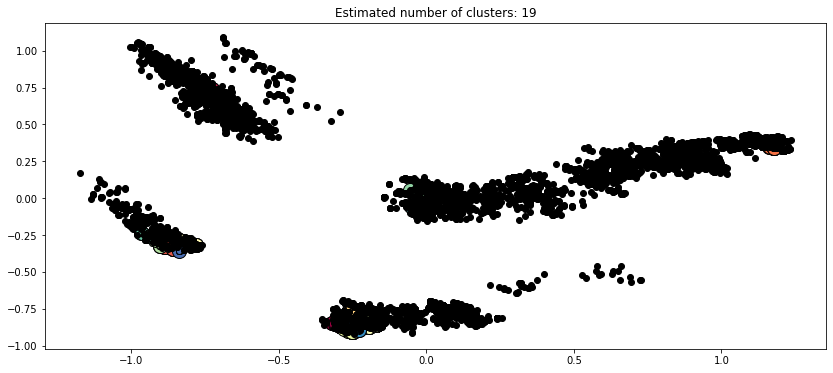

In [84]:
#plot DBSCAN clusters
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()